In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

In [22]:
X = np.array([-3.0, -2.5, -1.0, 0.0, 2.0, 4.0, 5.0])

mu1, sigma1 = -4.0, np.sqrt(1.0)
mu2, sigma2 = 0.0, np.sqrt(0.2)
mu3, sigma3 = 8.0, np.sqrt(3.0)


p1 = norm(loc = mu1, scale = sigma1)
p2 = norm(loc = mu2, scale = sigma2)
p3 = norm(loc = mu3, scale = sigma3)


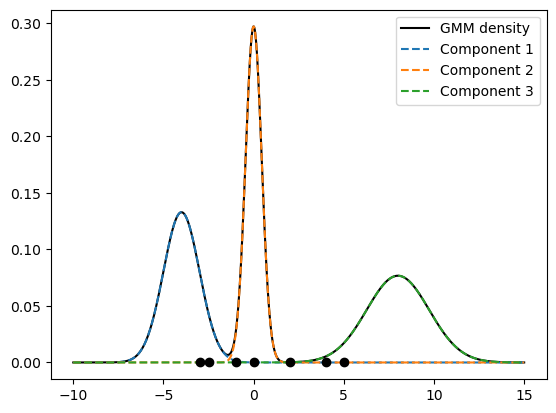

In [3]:
x = np.linspace(-10,15,num = 1000)
plt.plot(x, (1/3) * p1.pdf(x=x) + (1/3) * p2.pdf(x=x) + (1/3) * p3.pdf(x=x), '-', color = 'black', label = 'GMM density')
plt.plot(x, (1/3)*p1.pdf(x=x), '--', label = 'Component 1')
plt.plot(x, (1/3)*p2.pdf(x=x), '--', label = 'Component 2')
plt.plot(x, (1/3)*p3.pdf(x=x), '--', label = 'Component 3')
plt.plot(X, np.zeros_like(X), 'o', color = 'black')
plt.legend()

In [4]:
# Responsibility

N = len(X)  # N : the number of data
K = 3       # K : the number of GMM components

MU = np.array([mu1, mu2, mu3])
SIGMA = np.array([sigma1, sigma2, sigma3])
PI = np.array([1/3, 1/3, 1/3])

Res = np.zeros((N,K))   # Responsibility Matrix

def k_comp_likelihood(data, n,k, MU, SIGMA, PI):
    p = PI[k]*norm(loc = MU[k], scale = SIGMA[k]).pdf(x = data[n])
    return p

def responsibility(data,n, k, MU, SIGMA, PI):
    r_nk = k_comp_likelihood(data, n,k, MU, SIGMA, PI)/np.sum([k_comp_likelihood(data, n,i, MU, SIGMA, PI) for i in range(K)])
    return r_nk

def Responsibilities(data, N,K, MU, SIGMA, PI):
    N = len(data)
    K = len(MU)
    Res = np.zeros((N,K))
    for n in range(N):
        for k in range(K):
            Res[n,k] = responsibility(data, n,k, MU, SIGMA, PI)

    return Res

Res = Responsibilities(X, N,K, MU, SIGMA, PI)
print(Res)

[[9.99999998e-01 6.23744026e-10 1.66078939e-09]
 [9.99998854e-01 1.12775436e-06 1.86148295e-08]
 [5.70694724e-02 9.42926461e-01 4.06623892e-06]
 [1.50000042e-04 9.99843983e-01 6.01744506e-06]
 [9.93708362e-06 6.62368700e-02 9.33753193e-01]
 [3.15686365e-13 2.36801785e-16 1.00000000e+00]
 [2.00021110e-17 1.24761973e-26 1.00000000e+00]]


In [20]:
X@Res

array([-5.55704673, -0.81045554, 10.86750227])

In [21]:
# EM algorithm

def update_mean(data, MU, SIGMA, PI):
    N = len(data)
    K = len(MU)
    Res = Responsibilities(data, N, K, MU, SIGMA, PI)
    N_k = Res.sum(axis = 0)         # total responsibility of the k-th mixture component
    MU = X@Res / N_k
    return MU

update_mean(X, MU, SIGMA, PI)



array([-2.70123001, -0.40341072,  3.70428735])

In [ ]:


GMM_comps = [p1,p2,p3]

x = np.linspace(-10,15,num = 1000)
plt.plot(x, (1/3) * p1.pdf(x=x) + (1/3) * p2.pdf(x=x) + (1/3) * p3.pdf(x=x), '-', color = 'black', label = 'GMM density')
plt.plot(x, (1/3)*p1.pdf(x=x), '--', label = 'Component 1')
plt.plot(x, (1/3)*p2.pdf(x=x), '--', label = 'Component 2')
plt.plot(x, (1/3)*p3.pdf(x=x), '--', label = 'Component 3')
plt.plot(X, np.zeros_like(X), 'o', color = 'black')
plt.legend()